# HW Set 8 - Relax!  Waves and Fourier Transforms
## Due Oct 29, 2015

### Name:   James O. Thomas

#### Note: If a problem asks you to work things out for different initial conditions or timesteps, please first do your first choice in one cell, then copy your code with the new inputs into a new cell, etc.  Try to end up with a notebook that would be a complete solution if printed out.
---


In [2]:
%matplotlib inline

**Problem 1: Waves with free ends**

Modify the wave template code to model a string that has both ends free (instead of fixed).  In this case, our starting equation

$$
(\mu\Delta x) \frac{\partial^2y}{\partial t^2} = T\sin\theta_{i+1}-T\sin\theta_i
$$

is modified since only $T\sin\theta_{i+1}$ is non-zero.  Then for the left end,

$$
\frac{\partial^2y(0,n)}{\partial t^2} = \frac{T}{\mu}\frac{y_1-y_0}{(\Delta x)^2}
$$

and for the right end, we'd have only $T\sin\theta_{i}$ non-zero

$$
\frac{\partial^2y(M,n)}{\partial t^2} = \frac{T}{\mu}\frac{y_{M}-y_{M-1}}{(\Delta x)^2}
$$

Derive the needed expression for $y(0,n+1) = \ldots$, and insert this into your code.  You should find that the reflected wave packets are not inverted.

First, a brief derivation:

We know that the wave eqution is given by:

$$\frac{\partial ^2 \Psi }{\partial t^2} = c^2 \nabla ^2 \Psi $$

In 1 spacial dimension this reduces to:

$$\frac{\partial ^2 y }{\partial t^2} = c^2 \frac{\partial ^2 y }{\partial x^2} $$

We can approximate the second order differentials as:

$$ \frac{\partial ^2y}{\partial t^2} \approx \frac{y(x_m,t_{n+1}) + y(x_m,t_{n-1}) - 2y(x_m,t_n)}{(\Delta t)^2} $$

and

$$ \frac{\partial ^2y}{\partial x^2} \approx \frac{y(x_{i+m},t_n) + y(x_{m-1},t_n) - 2y(x_m,t_n)}{(\Delta x)^2} $$

When we plug these into the 1-D wave equation we get:

$$\frac{y(x_m,t_{n+1}) + y(x_m,t_{n-1}) - 2y(x_m,t_n)}{(\Delta t)^2} \approx c^2 \left( \frac{y(x_{m+1},t_n) + y(x_{m-1},t_n) - 2y(x_m,t_n)}{(\Delta x)^2} \right) $$

Solving this for $y(x_m,t_{n+1})$ we get:

$$ y(x_m,t_{n+1}) = 2\left( 1-r^2 \right) y(x_m,t_n) - y(x_m,t_{n-1}) + r^2 \left[ y(x_{m+1},t_n) + y(x_{m-1},t_n) \right] $$

where $ r^2 \equiv \left( \frac{c \Delta t}{\Delta x} \right) ^2 $.

This equation is only valid for the central spacial points on the string. The end points have to be treated slightly differently because they only have 1 tension acting on them. The other tension is 0. The easiest way (that I know of) to implement this in the code is simply to say that $y(x_{-1},t_n) = y(x_0, t_n)$ and $y(x_{M+1},t_n) = y(x_M,t_n)$. This may not be the most computationally efficienct means of performing this task, but it works.

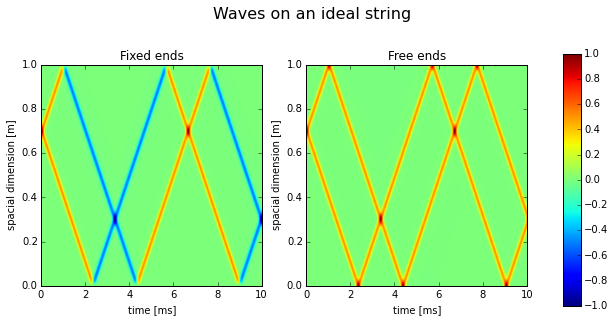

In [2]:
# Solution to problem 1, Waves with free ends
'''
Modified versino of
Waves on a string
by Dr. Wood.

James O. Thomas
October 2015
'''
import matplotlib.pyplot as plt
import numpy as np

def initialize(x):
    x0 = 0.3
    k = 1000  # m^-2
    y = np.exp(-k*(x-x0)**2)
    return y

M = 100  # segments of string
N = 300  # time steps
c = 300  # m/s
dx = 1.0/M
dt = dx/c
r2 = (dt*c/dx)**2


# fixed ends
x1 = np.linspace(0,1,M)
y1 = np.zeros([M,N])
t1 = np.linspace(0,N*dt,N)

y1[:,0] = initialize(x1)
y1[:,1] = y1[:,0]

for n in range(1,N-1):      # loop through time
    for m in range(1,M-1):    # loop through space
            y1[m, n+1] = r2*(y1[m+1,n] + y1[m-1,n]) + 2*(1-r2)*y1[m,n] - y1[m, n-1]

# free ends
x2 = np.linspace(0,1,M)
y2 = np.zeros([M,N])
t2 = np.linspace(0,N*dt,N)

y2[:,0] = initialize(x2)
y2[:,1] = y2[:,0]

for n in range(1,N-1):      # loop through time
    for m in range(0,M):    # loop through space
        if m == 0:          # the left side of sting
            y2[m, n+1] = r2*(y2[m+1,n] + y2[m,n]) + 2*(1-r2)*y2[m,n] - y2[m, n-1]
        elif m == M-1:        # the right side of string
            y2[m, n+1] = r2*(y2[m,n] + y2[m-1,n]) + 2*(1-r2)*y2[m,n] - y2[m, n-1]
        else:               # all the other points
            y2[m, n+1] = r2*(y2[m+1,n] + y2[m-1,n]) + 2*(1-r2)*y2[m,n] - y2[m, n-1]

#Plot
fig = plt.figure(figsize = (10,5))
plt.suptitle('Waves on an ideal string', size = 16)
ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(y1, extent = [0, np.max(t1)*1000, 0, 1], aspect = 10, vmin = -1, vmax = 1)
ax1.set_ylabel('spacial dimension [m]')
ax1.set_xlabel('time [ms]')
ax1.set_title('Fixed ends')

ax2 = fig.add_subplot(1,2,2)
im2 = ax2.imshow(y2, extent = [0, np.max(t2)*1000, 0, 1], aspect = 10, vmin = -1, vmax = 1)
ax2.set_ylabel('spacial dimension [m]')
ax2.set_xlabel('time [ms]')
ax2.set_title('Free ends')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
fig.colorbar(im1, cax=cbar_ax)

plt.show()

We can see in the plot above that when the ends of the string are fixed at 0, the wave is inverted upon reflection. However, when the ends are free, the wave is not inverted, thus $y \geq 0 $ for all values of space and time considered in this simulation.

---
**Problem G1: Driving the wave**

Investigate the motion of a string for which one end is held fixed, while the other is made to oscillate.  Do this by letting the string element at one end move according to $y(i=0) = A\sin(\omega t)$.  You should find that this generates a wave that propagates toward the opposite end of the string.  This wave is then reflected and it interferes with the initial wave.  Confirm that the frequency of this wave ($f = \omega/2\pi$) and it's wavelength are consisten with the parameter $c$ in the wave equation.  Also determine the values of $\omega$ that lead to standing waves.

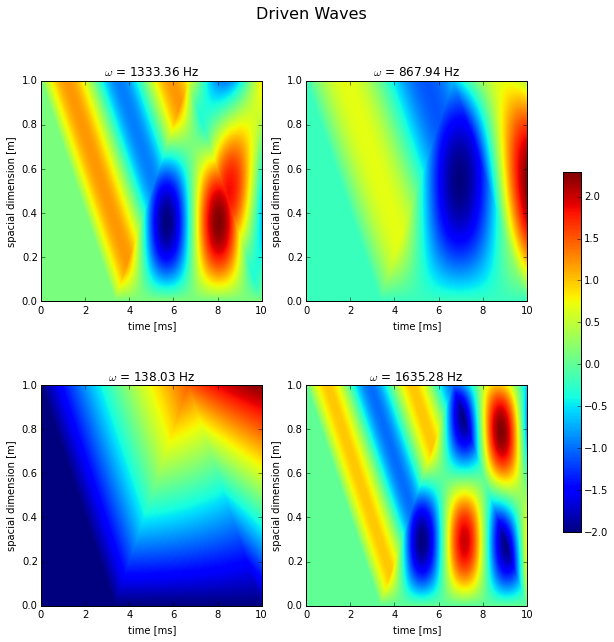

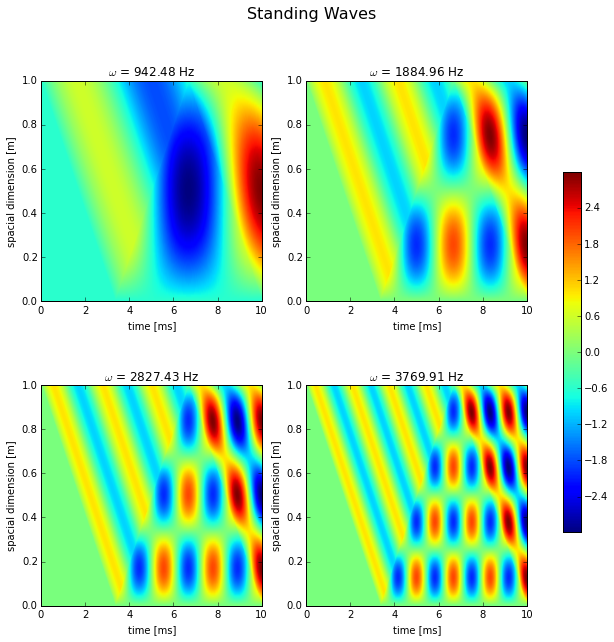

In [3]:
# Solution to problem G1, Driving the wave
'''
Modified versino of
Waves on a string
by Dr. Wood.

James O. Thomas
October 2015
'''
import matplotlib.pyplot as plt
import numpy as np

######################
# not standing waves #
######################

M = 100  # segments of string
N = 300  # time steps
c = 300  # m/s
dx = 1.0/M
dt = dx/c
r2 = (dt*c/dx)**2

# driving force
A = 1
omegas = np.random.random(4)*2*np.pi*c

fig = plt.figure(figsize = (10,10))
plt.suptitle('Driven Waves', size = 16)
axnum = 1

for omega in omegas:
    
    x = np.linspace(0,1,M)
    y = np.zeros([M,N])
    t = np.linspace(0,N*dt,N)

    for n in range(1,N-1):      # loop over time
        for m in range(1,M-1):  # loop over space
            y[0,n+1] = A*np.sin(omega*t[n+1])
            y[m, n+1] = r2*(y[m+1,n] + y[m-1,n]) + 2*(1-r2)*y[m,n] - y[m, n-1]
        
    #Plot
    
    ax1 = fig.add_subplot(2,2,axnum)
    im = ax1.imshow(y, extent = [0, np.max(t)*1000, 0, 1], aspect = 10)
    ax1.set_ylabel('spacial dimension [m]')
    ax1.set_xlabel('time [ms]')
    ax1.set_title(r'$\omega $ = '+str(round(omega,2))+' Hz')
    
    axnum += 1
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.25, 0.025, 0.5])   # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax)
plt.show()

#############################
# Now do the standing waves #
#############################

M = 100  # segments of string
N = 300  # time steps
c = 300  # m/s
dx = 1.0/M
dt = dx/c
r2 = (dt*c/dx)**2

# driving force
A = 1
lambdas = np.array([2, 1, 2./3, 0.5])
omegas = 2*np.pi*c/lambdas

fig = plt.figure(figsize = (10,10))
plt.suptitle('Standing Waves', size = 16)
axnum = 1

for omega in omegas:
    
    x = np.linspace(0,1,M)
    y = np.zeros([M,N])
    t = np.linspace(0,N*dt,N)

    for n in range(1,N-1):      # loop over time
        for m in range(1,M-1):  # loop over space
            y[0,n+1] = A*np.sin(omega*t[n+1])
            y[m, n+1] = r2*(y[m+1,n] + y[m-1,n]) + 2*(1-r2)*y[m,n] - y[m, n-1]
        
    #Plot
    
    ax1 = fig.add_subplot(2,2,axnum)
    im = ax1.imshow(y, extent = [0, np.max(t)*1000, 0, 1], aspect = 10)
    ax1.set_ylabel('spacial dimension [m]')
    ax1.set_xlabel('time [ms]')
    ax1.set_title(r'$\omega $ = '+str(round(omega,2))+' Hz')
    
    axnum += 1
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.25, 0.025, 0.5])   # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax)
plt.show()

In the first image above we can see random frequencies. In general, they are not standing waves. 

We can estimate their speed using $c=\lambda f$ which is true for all waves, not just standing waves. For 1 run of the code I get $f = 427.18 Hz $ and $ \lambda \approx 0.7 $. Thus

\begin{align}
c &= \lambda f \\
&= (0.7 \rm{m} )( 427.17 \rm{hz}) \\
&= 299 \rm{m/s} \\
& \approx 300 \rm{m/s}
\end{align}

which shows verifies that these waves do indeed propogate at the appropriate speed through the string.

In the second image the frequencies were chosen so that standing waves would form. We know that for a wave

$$c = \lambda f \rightarrow f = \frac{c}{\lambda} $$

we also know that

$$ f = \frac{\omega}{2\pi}$$

putting these two together we get:

$$ \frac{c}{\lambda} = \frac{\omega}{2\pi}$$

$$\therefore \omega = \frac{2\pi c}{\lambda}$$

For a standing wave to form, we have to have the box length equal integer multiples of half the wavelength. That is:

$$ l = n \frac{\lambda}{2} \hspace{1cm} n = 1, 2, 3, \ldots $$

$$\therefore \lambda = \frac{2l}{n} \hspace{1cm} n = 1, 2, 3, \ldots $$

Since we set our boxlenght to 1, the first several wavelengths that form standing waves are:

$$ \lambda = 2, 1, \frac{2}{3}, \frac{1}{2}, \ldots$$

We can then insert these into the given equation to solve for the frequencies necessary to have standing waves. In the first subplot of the second image half a wavelength fits in the box (one peak or one trough, but not both). The second subplot has 1 full wavelength (1 peak and 1 trough). The third subplot has $3/2$ wavelengths and the forth has 2 full wavelengths. These correspond to the standing wave condition we imposed on the wavelengths.

---
**Problem 2: Other inital wavepackets**

Study the propagation of wavepackets with other shapes.  For example, a guitar string that is plucked has an initial profile like that shown in the Figure.  Calculate how this excitation splits and moves with time.  

If you'd like to smooth it out before iterating through time, use (where import is at top of your code, and the smoothing line is in your initialization function:

    import scipy.ndimage.filters
    y = scipy.ndimage.filters.uniform_filter(y,size=5,mode='constant')

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/10/guitarpluck.png" />

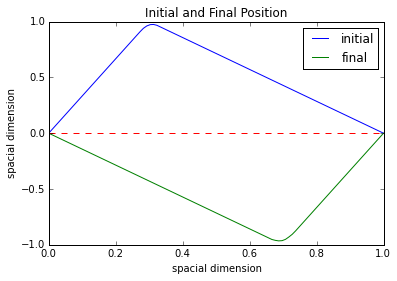

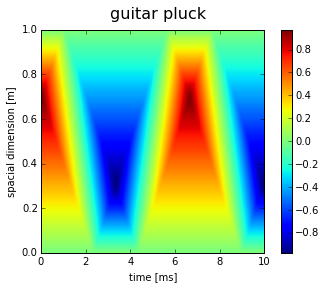

In [3]:
# Solution to problem 2: Other initial wavepackets
'''
Modified version of
Waves on a string
by Dr. Wood.

James O. Thomas
October 2015
'''
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage.filters

def initialize(x):
    n = len(x)
    y = np.zeros(n)
    x0 = 0.3
    change = int(n*x0)
    y[0:change] = x[0:change]/x0
    y[change:n] = 1/(x0-1)*(x[change:n]-1)
    y = scipy.ndimage.filters.uniform_filter(y,size = 5,mode='constant')
    # force the end points to go back to 0 after smoothing
    y[0:int(change/2)] = x[0:int(change/2)]/x0
    y[int(1.25*change):n] = 1/(x0-1)*(x[int(1.25*change):n]-1)
    return y

M = 100  # segments of string
N = 300  # time steps
c = 300  # m/s
dx = 1.0/M
dt = dx/c
r2 = (dt*c/dx)**2

x = np.linspace(0,1,M)
y = np.zeros([M,N])
t = np.linspace(0,N*dt,N)

y[:,0] = initialize(x)
y[:,1] = y[:,0]

for n in range(1,N-1):
    for m in range(1,M-1):
        y[m, n+1] = r2*(y[m+1,n] + y[m-1,n]) + 2*(1-r2)*y[m,n] - y[m, n-1]
        
# plot the initial position
plt.figure()
plt.plot(x,y[:,0], label = 'initial')
plt.plot(x,y[:,N-1], label = 'final')
plt.plot([0,1],[0,0], 'r--')
plt.title('Initial and Final Position')
plt.xlabel('spacial dimension')
plt.ylabel('spacial dimension')
plt.ylim(-1,1)
plt.legend()
plt.show()        
        
#Plot
fig = plt.figure()
plt.suptitle('guitar pluck', size = 16)
ax1 = fig.add_subplot(1,1,1)
im = ax1.imshow(y, extent = [0, np.max(t)*1000, 0, 1], aspect = 10)
ax1.set_ylabel('spacial dimension [m]')
ax1.set_xlabel('time [ms]')
cbar = fig.colorbar(im)

plt.show()

We can see that the initial waveform splits into two waves, one traveling in the positive direction and one in the negative. At the boundaries each wave is reflected and inverted (like the Gaussian pluck). The waves interfere with each other when they pass back through the waves. After about 3 ms the waves constructively and form a waveform similar to the original, but it is flipped upside down and reflected about the middle of the length. This can be seen in the first image above.

---
**Problem 3: Fourier Transform of Guitar Pluck**

Now modify your guitar pluck code to store the values of the displacement versus time at a location 1/8 the string length (i.e., y_pickup = y[int(M/8),:]).  First, plot about 10 cycles of the wave.  Next, use rfft() and rfftfreq() to calculate the Fast Fourier Transform and plot the results.  How do your results change as you increase the number of cycles you take the transform of?  Next, make a plot that shows the FFT of 2 different guitar plucks, one where the pluck is in the center of the string, and one where it is plucked at distance M/8.  Discuss the differences in the frequencies present.

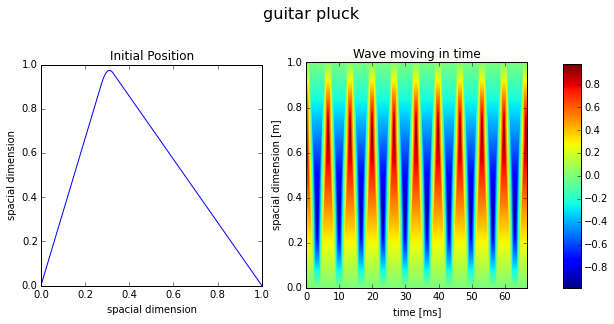

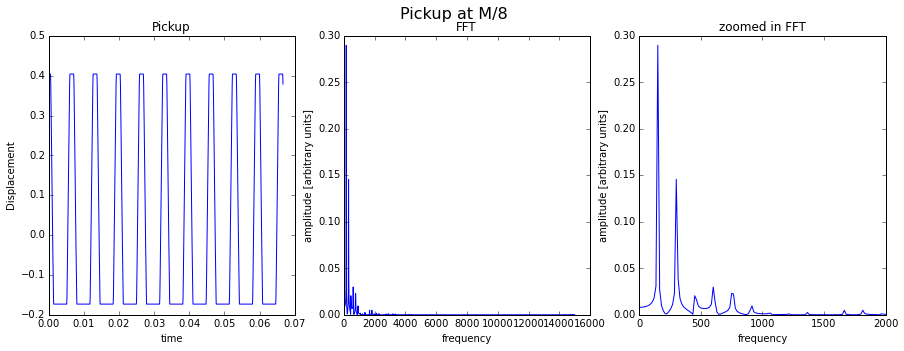

In [5]:
# solution to prolbem 3: Fourier Transform of Guitar Pluck
# about 10 cycles to see if it works
'''
Modified version of
Waves on a string
by Dr. Wood.

James O. Thomas
October 2015
'''
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage.filters

def initialize(x):
    n = len(x)
    y = np.zeros(n)
    x0 = 0.3
    change = int(n*x0)
    y[0:change] = x[0:change]/x0
    y[change:n] = 1/(x0-1)*(x[change:n]-1)
    y = scipy.ndimage.filters.uniform_filter(y,size = 5,mode='constant')
    # force the end points to go back to 0 after smoothing
    y[0:int(change/2)] = x[0:int(change/2)]/x0
    y[int(1.25*change):n] = 1/(x0-1)*(x[int(1.25*change):n]-1)
    return y

M = 100  # segments of string
N = 2000  # time steps
c = 300  # m/s
dx = 1.0/M
dt = dx/c
r2 = (dt*c/dx)**2

x = np.linspace(0,1,M)
y = np.zeros([M,N])
t = np.linspace(0,N*dt,N)

y[:,0] = initialize(x)
y[:,1] = y[:,0]

for n in range(1,N-1):
    for m in range(1,M-1):
        y[m, n+1] = r2*(y[m+1,n] + y[m-1,n]) + 2*(1-r2)*y[m,n] - y[m, n-1]
        
y_pickup = y[int(M/8),:]
fft_amp = np.abs(np.fft.rfft(y_pickup))*2/len(y_pickup)
fft_freq = np.fft.rfftfreq(len(y_pickup), dt)
        
#Plot the wave
fig = plt.figure(figsize = (10,5))
plt.suptitle('guitar pluck', size = 16)

ax1 = fig.add_subplot(1,2,2)
im = ax1.imshow(y, extent = [0, np.max(t)*1000, 0, 1], aspect = 68)
ax1.set_ylabel('spacial dimension [m]')
ax1.set_xlabel('time [ms]')
ax1.set_title('Wave moving in time')

ax2 = fig.add_subplot(1,2,1, aspect = 1)
ax2.plot(x,y[:,0])
ax2.set_xlabel('spacial dimension')
ax2.set_ylabel('spacial dimension')
ax2.set_title('Initial Position')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.2, 0.025, 0.62])   # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax)
plt.show()

fig = plt.figure(figsize = (15,5))
plt.suptitle('Pickup at M/8', size = 16)

ax1 = fig.add_subplot(1,3,1)
ax1.plot(t,y_pickup)
ax1.set_title('Pickup')
ax1.set_ylabel('Displacement')
ax1.set_xlabel('time')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(fft_freq, fft_amp)
ax2.set_xlabel('frequency')
ax2.set_ylabel('amplitude [arbitrary units]')
ax2.set_title('FFT')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(fft_freq, fft_amp)
ax3.set_xlabel('frequency')
ax3.set_ylabel('amplitude [arbitrary units]')
ax3.set_title('zoomed in FFT')
ax3.set_xlim(0,2000)

plt.show()

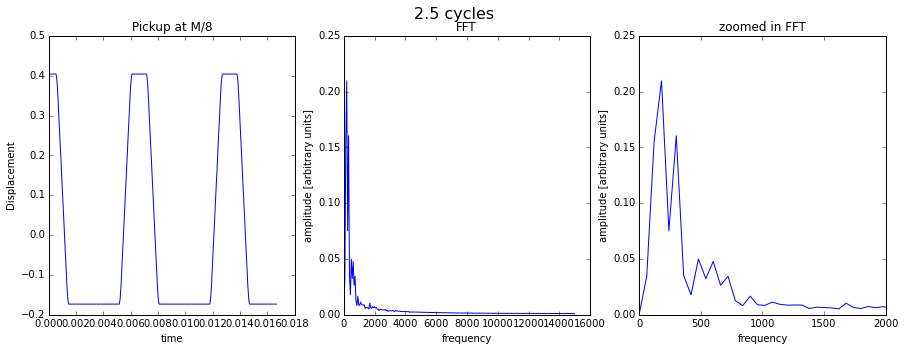

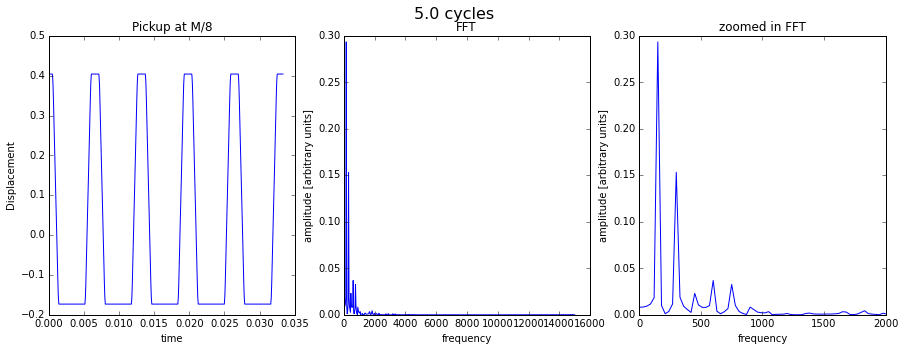

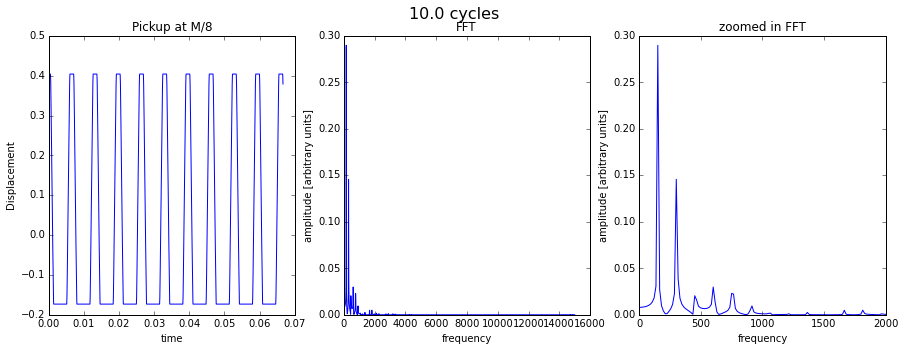

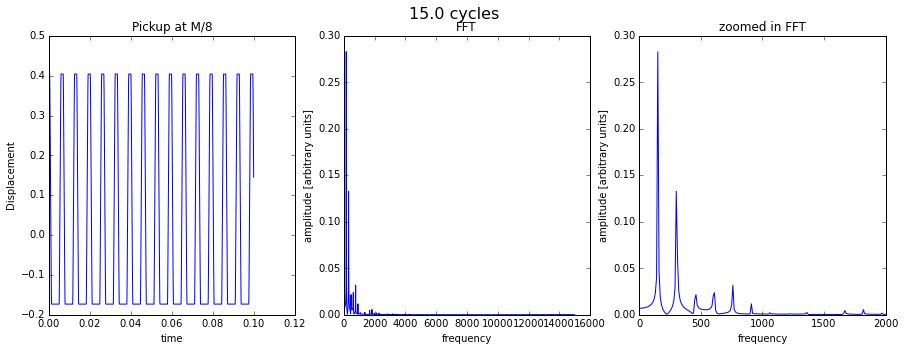

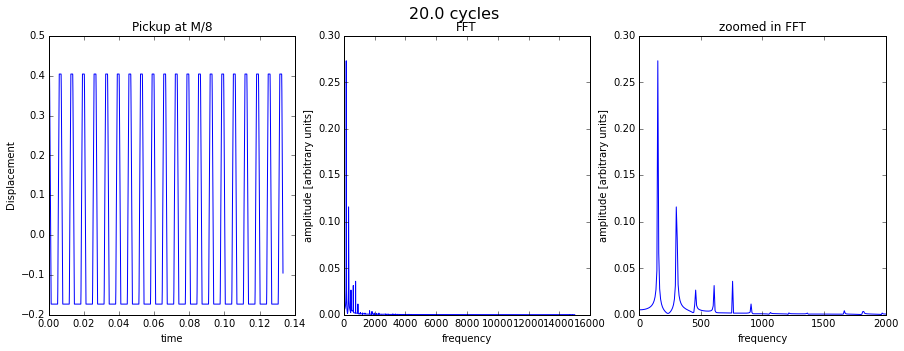

In [6]:
# solution to prolbem 3: Fourier Transform of Guitar Pluck
# change the number of cycles and see how fft changes
'''
Modified version of
Waves on a string
by Dr. Wood.

James O. Thomas
October 2015
'''
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage.filters

def initialize(x):
    n = len(x)
    y = np.zeros(n)
    x0 = 0.3
    change = int(n*x0)
    y[0:change] = x[0:change]/x0
    y[change:n] = 1/(x0-1)*(x[change:n]-1)
    y = scipy.ndimage.filters.uniform_filter(y,size = 5,mode='constant')
    # force the end points to go back to 0 after smoothing
    y[0:int(change/2)] = x[0:int(change/2)]/x0
    y[int(1.25*change):n] = 1/(x0-1)*(x[int(1.25*change):n]-1)
    return y

M = 100  # segments of string
cycles = np.array([500, 1000, 2000, 3000, 4000])  # time steps
c = 300  # m/s
dx = 1.0/M
dt = dx/c
r2 = (dt*c/dx)**2

for N in cycles:

    x = np.linspace(0,1,M)
    y = np.zeros([M,N])
    t = np.linspace(0,N*dt,N)

    y[:,0] = initialize(x)
    y[:,1] = y[:,0]

    for n in range(1,N-1):
        for m in range(1,M-1):
            y[m, n+1] = r2*(y[m+1,n] + y[m-1,n]) + 2*(1-r2)*y[m,n] - y[m, n-1]
        
    y_pickup = y[int(M/8),:]
    fft_amp = np.abs(np.fft.rfft(y_pickup))*2/len(y_pickup)
    fft_freq = np.fft.rfftfreq(len(y_pickup), dt)
        
    #Plot the wave

    fig = plt.figure(figsize = (15,5))
    plt.suptitle(str(round(N/200,2))+' cycles', size = 16)

    ax1 = fig.add_subplot(1,3,1)
    ax1.plot(t,y_pickup)
    ax1.set_title('Pickup at M/8')
    ax1.set_ylabel('Displacement')
    ax1.set_xlabel('time')

    ax2 = fig.add_subplot(1,3,2)
    ax2.plot(fft_freq, fft_amp)
    ax2.set_xlabel('frequency')
    ax2.set_ylabel('amplitude [arbitrary units]')
    ax2.set_title('FFT')

    ax3 = fig.add_subplot(1,3,3)
    ax3.plot(fft_freq, fft_amp)
    ax3.set_xlabel('frequency')
    ax3.set_ylabel('amplitude [arbitrary units]')
    ax3.set_title('zoomed in FFT')
    ax3.set_xlim(0,2000)

    plt.show()

We can see that not using very many cycles leads to poor results in the fft. As we include more and more cycles in the Fourier transform, the peaks present in the frequency domain are better resolved. However, I can not see much difference in the frequency domains after about 5 or 10 cycles. If the wave form being studied was more complicatied then including more cycles int the time domain would be necessary to clearly resolve the structure present in the frequency domain. 

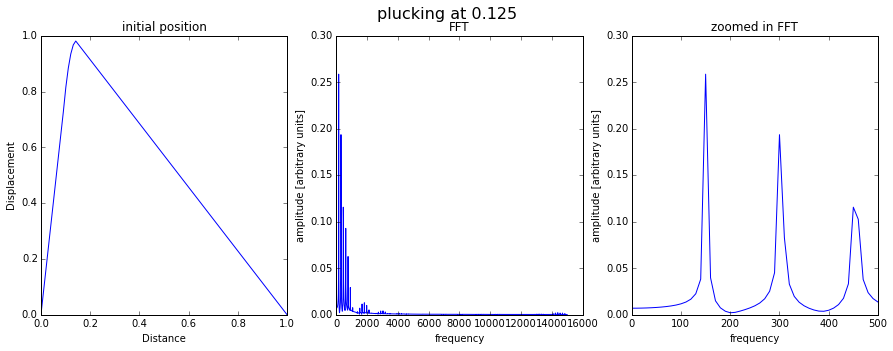

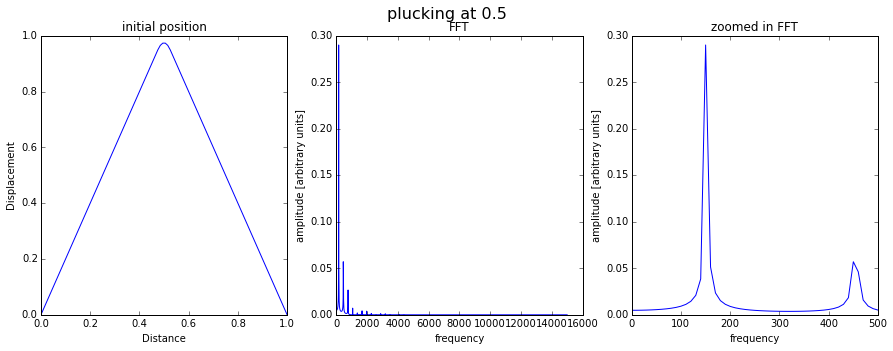

In [3]:
# solution to prolbem 3: plucking the string in different places
# increase the number of cycles and see how fft changes
'''
Modified version of
Waves on a string
by Dr. Wood.

James O. Thomas
October 2015
'''
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage.filters

def initialize(x, x0):
    n = len(x)
    y = np.zeros(n)
    change = int(n*x0)
    y[0:change] = x[0:change]/x0
    y[change:n] = 1/(x0-1)*(x[change:n]-1)
    y = scipy.ndimage.filters.uniform_filter(y,size = 5,mode='constant')
    # force the end points to go back to 0 after smoothing
    y[0:int(change/2)] = x[0:int(change/2)]/x0
    y[int(1.25*change):n] = 1/(x0-1)*(x[int(1.25*change):n]-1)
    return y

M = 100  # segments of string
N = 3000  # time steps
c = 300  # m/s
dx = 1.0/M
dt = dx/c
r2 = (dt*c/dx)**2
plucks = [1/8, 1/2]

for x0 in plucks:
    x = np.linspace(0,1,M)
    y = np.zeros([M,N])
    t = np.linspace(0,N*dt,N)

    y[:,0] = initialize(x, x0)
    y[:,1] = y[:,0]

    for n in range(1,N-1):
        for m in range(1,M-1):
            y[m, n+1] = r2*(y[m+1,n] + y[m-1,n]) + 2*(1-r2)*y[m,n] - y[m, n-1]
        
    y_pickup = y[int(M/8),:]
    fft_amp = np.abs(np.fft.rfft(y_pickup))*2/len(y_pickup)
    fft_freq = np.fft.rfftfreq(len(y_pickup), dt)
        
    #Plot the wave

    fig = plt.figure(figsize = (15,5))
    plt.suptitle('plucking at '+str(x0), size = 16)

    ax1 = fig.add_subplot(1,3,1)
    ax1.plot(x,y[:,0])
    ax1.set_title('initial position')
    ax1.set_ylabel('Displacement')
    ax1.set_xlabel('Distance')

    ax2 = fig.add_subplot(1,3,2)
    ax2.plot(fft_freq, fft_amp)
    ax2.set_xlabel('frequency')
    ax2.set_ylabel('amplitude [arbitrary units]')
    ax2.set_title('FFT')

    ax3 = fig.add_subplot(1,3,3)
    ax3.plot(fft_freq, fft_amp)
    ax3.set_xlabel('frequency')
    ax3.set_ylabel('amplitude [arbitrary units]')
    ax3.set_title('zoomed in FFT')
    ax3.set_xlim(0,500)

    plt.show()

We can see that when the string is plucked at $1/8$ of the length, then both even and odd harmonics appear in the Fourier transform. However, when the string is plucked in the middle, only the odd harmoics appear in the Fourier transform. When the string is plucked in the exact middle it shows a symmetry about the midpoint. Any amplitudes corresponding to frequencies representing the odd harmonics have to be 0 since those harmonics would break this symmetry. Similar arguments are used when analyzing the parity of a wave function.

---
**Problem 4: Fourier Filtering**

Do problem 7.4 from your textbook.

** Exercise 7.4: Fourier filtering and smoothing.**

in the on-line resources you'll find a file called dow.txt. It contains the daily closings value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market. 

Write a program to do the following:

1. read in the data from dow.txt and plot them on a graph.

2. Calculate the coefficients of the discrete Fourier transform of the data using the functino rfft from numpy.fft, which produces and array of $\frac{1}{2}N + 1$ complex numbers.

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%).

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function irfft, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. what is happening when you set the Fourier coefficinets to zero?

5. Modify your program so that is sets all but the first 2% of the coefficients to zero and run it again.


---

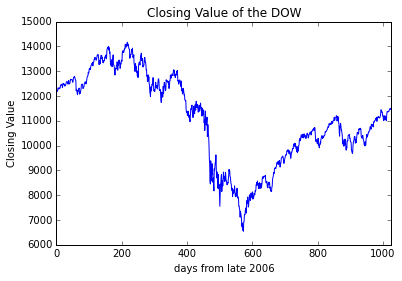

In [8]:
# Solution to problem 4-1
'''
James O. Thomas
October 2015
'''
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

DOW = np.loadtxt("dow.txt")
day = np.linspace(0,len(DOW),len(DOW))

plt.figure()
plt.plot(day,DOW)
plt.title('Closing Value of the DOW')
plt.xlabel('days from late 2006')
plt.ylabel('Closing Value')
plt.xlim(0,np.max(day))
plt.show()

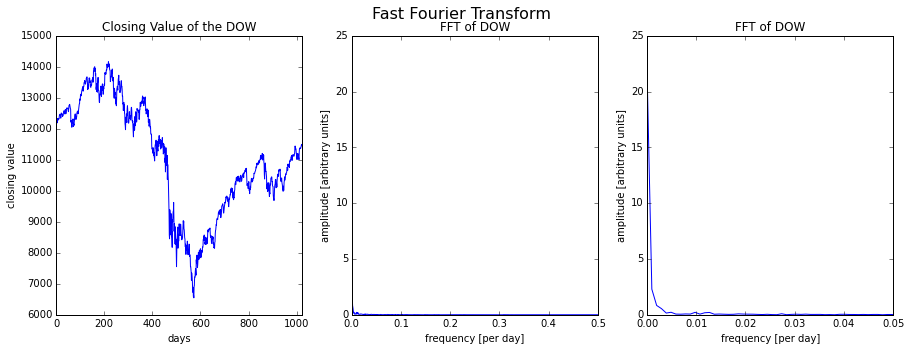

In [9]:
# Solution to problem 4-2
'''
James O. Thomas
October 2015
'''
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

DOW = np.loadtxt("dow.txt")
day = np.linspace(0,len(DOW),len(DOW))

fft_amp = np.abs(np.fft.rfft(DOW))*2/len(DOW)/1000
fft_freq = np.fft.rfftfreq(len(DOW), 1)

# now plot
fig = plt.figure(figsize = (15,5))
plt.suptitle('Fast Fourier Transform', size = 16)

ax1 = fig.add_subplot(1,3,1)
ax1.plot(day,DOW)
ax1.set_xlabel('days')
ax1.set_ylabel('closing value')
ax1.set_xlim(0,np.max(day))
ax1.set_title('Closing Value of the DOW')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(fft_freq, fft_amp)
ax2.set_xlabel('frequency [per day]')
ax2.set_ylabel('amplitude [arbitrary units]')
ax2.set_xlim(0,np.max(fft_freq))
ax2.set_title('FFT of DOW')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(fft_freq, fft_amp)
ax3.set_xlabel('frequency [per day]')
ax3.set_ylabel('amplitude [arbitrary units]')
ax3.set_xlim(0,np.max(fft_freq)*0.1)
ax3.set_title('FFT of DOW')

plt.show()


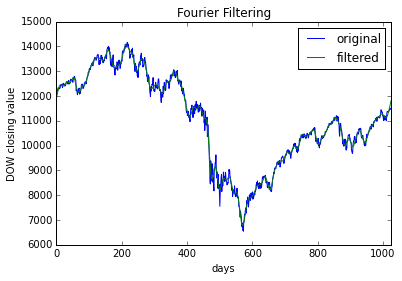

In [10]:
# Solution to problem 4-3 and 4-4
'''
James O. Thomas
October 2015
'''
import numpy as np
import matplotlib.pyplot as plt

DOW = np.loadtxt("dow.txt")
day = np.linspace(0,len(DOW),len(DOW))

fft_amp = np.fft.rfft(DOW)   # have to keep the phase informatino for irfft to work as expected.
fft_freq = np.fft.rfftfreq(len(DOW), 1)

## set all but the first 10% of the frequencies to 0
fft_amp2 = np.copy(fft_amp)
fft_amp2[int(0.1*len(fft_amp2)):] = 0

# calculate the inverse fourier transform of this new data set
DOW2 = np.fft.irfft(fft_amp2)

# Plot this
plt.figure()
plt.plot(day, DOW, label = 'original')
plt.plot(day, DOW2, label = 'filtered')
plt.title('Fourier Filtering')
plt.xlabel('days')
plt.ylabel('DOW closing value')
plt.xlim(0,np.max(day))
plt.legend()
plt.show()

We can see that the filtered data is much smoother than the original data. When we set all of the high frequency coefficients to zero we removed any contribution they had on the data set. This smoothed out the data.

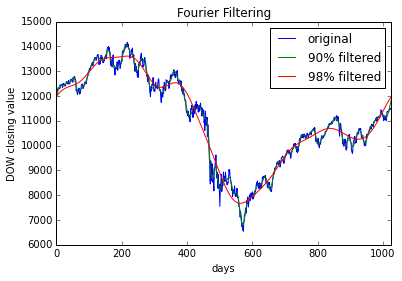

In [2]:
# Solution to problem 4-5
'''
James O. Thomas
October 2015
'''
import numpy as np
import matplotlib.pyplot as plt

DOW = np.loadtxt("dow.txt")
day = np.linspace(0,len(DOW),len(DOW))

fft_amp = np.fft.rfft(DOW)   # have to keep the phase informatino for irfft to work as expected.
fft_freq = np.fft.rfftfreq(len(DOW), 1)

fft_amp2 = np.copy(fft_amp)
fft_amp3 = np.copy(fft_amp)
fft_amp2[int(0.1*len(fft_amp2)):] = 0   # set 90% to 0
fft_amp3[int(0.02*len(fft_amp3)):] = 0  # set 98* to 0

# calculate the inverse fourier transform of this new data set
DOW2 = np.fft.irfft(fft_amp2)
DOW3 = np.fft.irfft(fft_amp3)

# Plot this
plt.figure()
plt.plot(day, DOW, label = 'original')
plt.plot(day, DOW2, label = '90% filtered')
plt.plot(day, DOW3, label = '98% filtered')
plt.title('Fourier Filtering')
plt.xlabel('days')
plt.ylabel('DOW closing value')
plt.xlim(0,np.max(day))
plt.legend()
plt.show()

As we set more and more of the values of the fequencies to 0 we get more and more smoothing. This is to be expected because we are only leaving the low frequency data intact.